### 1. Import and data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time


In [2]:
df = pd.read_csv("../data/chess_games_feature.csv")
df.head()

,WhiteElo,BlackElo,ResultNumeric,EventTypeID,RatingDiff,AvgRating,WhiteHigherRated,ECOID
0,2504,2371,1.0,0,133,2437.5,1,0
1,2487,2596,0.5,0,109,2541.5,0,0
2,2915,2921,0.5,0,6,2918.0,0,0
3,2542,2433,1.0,0,109,2487.5,1,10
4,2473,2658,0.0,0,185,2565.5,0,0


### 2. Prepare data

In [3]:
X = df.drop('ResultNumeric', axis=1)
y = df['ResultNumeric']

# 0 = Black Win, 1 = Draw, 2 = White Win
y = y.map({0.0: 0, 0.5: 1, 1.0: 2})

print(f"Features: {X.shape}")
print(f"Target: {y.shape}")
y.value_counts()

Features: (3266132, 7)
Target: (3266132,)


ResultNumeric
2    1507160
0    1338299
1     420673
Name: count, dtype: int64

### 3. Train test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,        # 20% for testing
    random_state=42,
    stratify=y
)

### 4. Train model

In [5]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1,                # Use all CPU cores
)

In [6]:
start_time = time.time()

rf_model.fit(X_train, y_train)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

Training completed in 126.54 seconds (2.11 minutes)


### 5. Evaluate

In [7]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)\n")

print("Classification Report: \n")
print(classification_report(y_test, y_pred, target_names=['Black Win', 'Draw', 'White Win']))

Accuracy: 0.5812 (58.12%)

Classification Report: 

              precision    recall  f1-score   support

   Black Win       0.55      0.57      0.56    267660
        Draw       0.86      0.27      0.41     84135
   White Win       0.58      0.68      0.63    301432

    accuracy                           0.58    653227
   macro avg       0.67      0.50      0.53    653227
weighted avg       0.61      0.58      0.57    653227



### 6. Confusion Matrix

In [8]:
cm = confusion_matrix(y_test, y_pred, labels=['Black_Win', 'Draw', 'White_Win'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Black Win', 'Draw', 'White Win'],
            yticklabels=['Black Win', 'Draw', 'White Win'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

ValueError: At least one label specified must be in y_true

### 7. Feature Importance


Feature Importance:
            Feature  Importance
1          BlackElo    0.210968
4         AvgRating    0.199963
0          WhiteElo    0.190230
5  WhiteHigherRated    0.189859
3        RatingDiff    0.143430
6             ECOID    0.038756
2       EventTypeID    0.026793


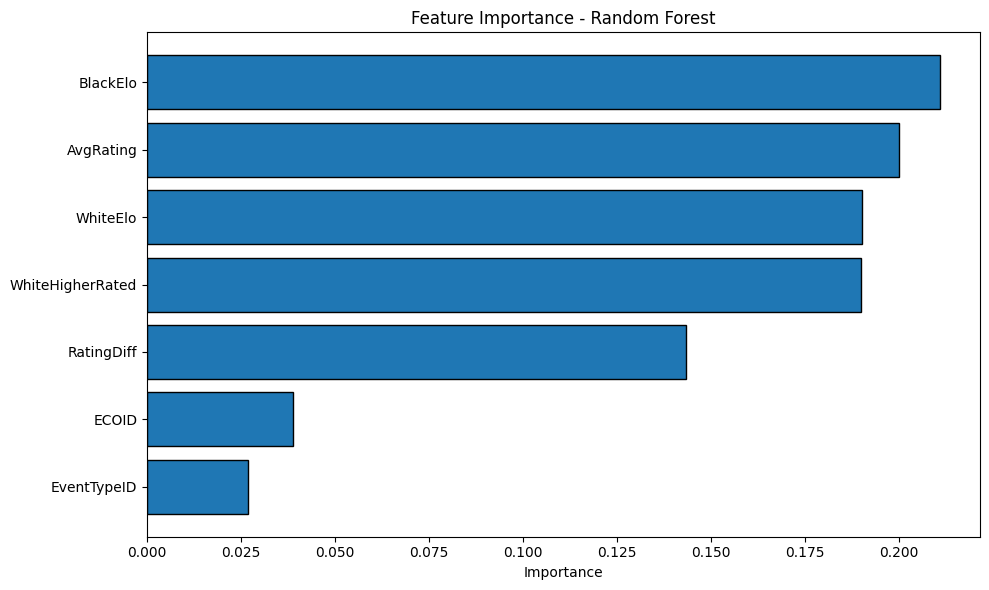

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], edgecolor="black")
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()